In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("newdataset.csv")
data.head(10)

,source_id,source,Rumor_label,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
6,2402,Borderlands,Positive,So I spent a few hours making something for fu...
7,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
8,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
9,2402,Borderlands,Positive,So I spent a few hours making something for fu...


In [4]:
data.shape

(74682, 4)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   source_id    74682 non-null  int64 
 1   source       74682 non-null  object
 2   Rumor_label  74682 non-null  object
 3   text         73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [6]:
data.isna().sum()

source_id        0
source           0
Rumor_label      0
text           686
dtype: int64

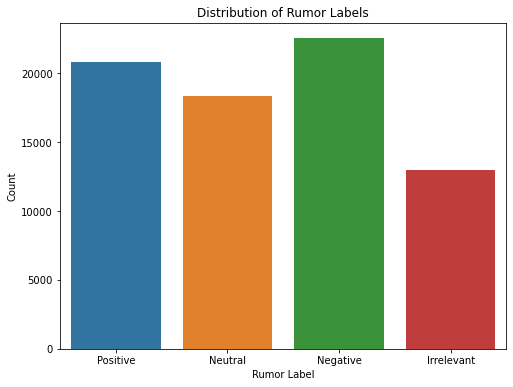

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Rumor_label', data=data)
plt.title('Distribution of Rumor Labels')
plt.xlabel('Rumor Label')
plt.ylabel('Count')
plt.show()

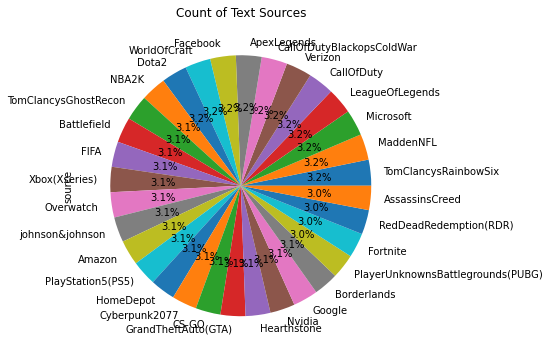

In [8]:
text_source_counts = data['source'].value_counts()
plt.figure(figsize=(8, 6))
text_source_counts.plot(kind='pie',autopct='%1.1f%%')
plt.title('Count of Text Sources')
plt.show()

In [9]:
X = data['text']
y = data['Rumor_label']

In [10]:
print(X,"\n\n\n",y)

0        im getting on borderlands and i will murder yo...
1        I am coming to the borders and I will kill you...
2        im getting on borderlands and i will kill you ...
3        im coming on borderlands and i will murder you...
4        im getting on borderlands 2 and i will murder ...
                               ...                        
74677    Just realized that the Windows partition of my...
74678    Just realized that my Mac window partition is ...
74679    Just realized the windows partition of my Mac ...
74680    Just realized between the windows partition of...
74681    Just like the windows partition of my Mac is l...
Name: text, Length: 74682, dtype: object 


 0        Positive
1        Positive
2        Positive
3        Positive
4        Positive
           ...   
74677    Positive
74678    Positive
74679    Positive
74680    Positive
74681    Positive
Name: Rumor_label, Length: 74682, dtype: object


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fill NaN values in the 'text' column with an empty string
data['text'].fillna('', inplace=True)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(data['text'])


In [12]:
X_vectorized

<74682x31062 sparse matrix of type '<class 'numpy.float64'>'
	with 1213146 stored elements in Compressed Sparse Row format>

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.metrics import accuracy_score,classification_report



from sklearn.svm import LinearSVC

S_classifier = LinearSVC()
S_classifier.fit(X_train, y_train)
y_pred = S_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred)*100

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.90      0.81      0.85      2592
    Negative       0.87      0.89      0.88      4519
     Neutral       0.89      0.84      0.86      3596
    Positive       0.82      0.89      0.86      4230

    accuracy                           0.87     14937
   macro avg       0.87      0.86      0.86     14937
weighted avg       0.87      0.87      0.87     14937



In [15]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_y_pred = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)*100

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.90      0.81      0.85      2592
    Negative       0.87      0.89      0.88      4519
     Neutral       0.89      0.84      0.86      3596
    Positive       0.82      0.89      0.86      4230

    accuracy                           0.87     14937
   macro avg       0.87      0.86      0.86     14937
weighted avg       0.87      0.87      0.87     14937



In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_y_pred = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_y_pred)*100

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.90      0.81      0.85      2592
    Negative       0.87      0.89      0.88      4519
     Neutral       0.89      0.84      0.86      3596
    Positive       0.82      0.89      0.86      4230

    accuracy                           0.87     14937
   macro avg       0.87      0.86      0.86     14937
weighted avg       0.87      0.87      0.87     14937



In [17]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_y_pred = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_y_pred)*100

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.90      0.81      0.85      2592
    Negative       0.87      0.89      0.88      4519
     Neutral       0.89      0.84      0.86      3596
    Positive       0.82      0.89      0.86      4230

    accuracy                           0.87     14937
   macro avg       0.87      0.86      0.86     14937
weighted avg       0.87      0.87      0.87     14937



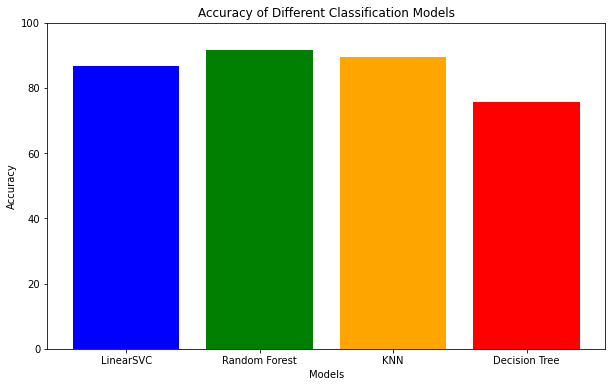

The best model is 'Random Forest' with an accuracy of 91.65829818571332


In [26]:
models = ['LinearSVC', 'Random Forest', 'KNN', 'Decision Tree']
accuracies = [svm_accuracy, rf_accuracy, knn_accuracy, dt_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classification Models')
plt.ylim(0, 100)
plt.show()

best_model_index = accuracies.index(max(accuracies))
best_model = models[best_model_index]
print(f"The best model is '{best_model}' with an accuracy of {max(accuracies)}")


In [27]:
if best_model == 'LinearSVC':
    classifier = LinearSVC()
elif best_model == 'Random Forest':
    classifier = RandomForestClassifier()
elif best_model == 'KNN':
    classifier = KNeighborsClassifier()
else:
    classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
y_pred = classifier.predict(X_test)

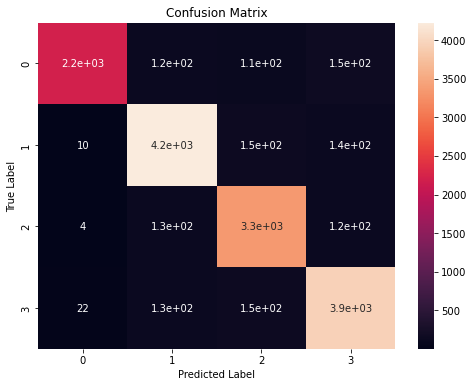

In [21]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [25]:
example_text = [input("Enter rumor: ")]
example_text_vectorized = vectorizer.transform(example_text)
prediction = classifier.predict(example_text_vectorized)
print("Example prediction:", prediction)

Enter rumor: trump is a good man
Example prediction: ['Positive']


In [23]:
import pickle
with open('rumor_classifier.pkl', 'wb') as model_file:
    pickle.dump(classifier, model_file)